# In Vino Veritas - A wine quality prediction project

## Project Overview
### Goals
The goal with this project is to create a machine learning model to predict the quality of a wine based on it's physicochemical properties. Also it will be to determine key drivers in the wine quality.
This Dataset was acquired through UCI's Machine Learning Repository and can be found [here](https://archive-beta.ics.uci.edu/ml/datasets/186)



### Findings


### Conclusion

### Re Creation

If you wish to recreate this project download the csv files for [red wine](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) and [white wine](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv) and save them to your repo. More information about this data can be found [here] <---- Insert link here

In [61]:
# import modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# set plot defaults
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['axes.titlesize'] = 15

sns.set_style('darkgrid')
# create module for this to hide color paalette and such

# import modeling tools

# import custom modules
import prepare as p
import explore as ex

In [93]:
wine_palette = ['#310c2d', '#672547', '#9e5f77', '#ddb49d', '#a96f55', '#929724']
wine_palette2 = ['#8d4271', '#310c2d', '#7c0000', '#8e314a', '#b15b58', '#c4a8ad', '#c1937d','#f2e9da']
wine_contrast = ['#672547', '#929724','#7c0000', '#b15b58', '#f2e9da' ]
wine_diverging = ['#8d4271', '#f2e9da', '#929724' ]

sns.set_palette(wine_contrast)
sns.color_palette(wine_diverging)

[(0.5529411764705883, 0.25882352941176473, 0.44313725490196076),
 (0.9490196078431372, 0.9137254901960784, 0.8549019607843137),
 (0.5725490196078431, 0.592156862745098, 0.1411764705882353)]

In [3]:
# import data from csv
# delimeter is semi colons not commas
red_wines = pd.read_csv('winequality-red.csv', delimiter=';')
white_wines = pd.read_csv('winequality-white.csv', delimiter=';')

In [4]:
# look at red wine df
red_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#1599 entries
red_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# look at white wine df
white_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
# 4898 entries
white_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### Takeaways Data Acquisition
- Looks like there are no nulls in the dataset (yay!)
- Both have the same columns and column names
- All types floats or ints

**ToDo**
- concat tables togeher to have one long list
- create column to denote that wine is red or white (is_white boolian)

In [8]:
# add feature is_white
# put in prep function

def white_or_red(white_df, red_df):
    '''
    This function takes in the red wine dataframe and the white wine dataframe
    Adds a column to each called 'is_white'
    Assigns 1 (true) to all rows in the white_df
    and 0 to all rows in the red_df
    returns both dataframes
    '''
    white_df['is_white'] = 1
    red_df['is_white'] = 0
    
    return white_df, red_df

In [9]:
white_df, red_df = white_or_red(white_wines, red_wines)

In [10]:
# concat tables
# put in Prepare Function
def join_red_and_white(white_df, red_df):
    '''
    This function takes in the white df and the red df
    Concats them together
    Returns the full df
    '''
    
    full_df = pd.concat([red_df, white_df])

    return full_df

In [11]:
# use function to get full dataframe
df = join_red_and_white(white_df, red_df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  is_white              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [13]:
df.shape

(6497, 13)

In [14]:
# need to rename columns so easier to type
new_names = [col.replace(' ', '_') for col in list(df)]
new_names

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'is_white']

In [15]:
df.columns = new_names

In [16]:
def rename_columns(df):
    '''
    This function takes in a dataframe
    Replaces all ' ' (spaces) with '_'
    Returns the dataframe with the new names as col names
    '''
    # use list comp to replace with _
    # assign to columns of df
    df.columns = [col.replace(' ', '_') for col in list(df)]
    
    return df

In [17]:
# use function to rename columns
df = rename_columns(df)

### Takeaways
- Now have dataframe with 6497 rows and 13 columns

<hr style="border-top: 10px groove #7c0000; margin-top: 1px; margin-bottom: 1px"></hr>

## Explore
- Before performing Train Validate Test split, I'll do some Univariate Exploration to see distribution of variables 
- Then we'll split and continue to explore, looking for relationships between the data

In [71]:
def explore_univariate(df, figsize = (18,3)):
    '''
    This function is for exploring. Takes in a dataframe with variables you would like to see the box plot of.
    Input the dataframe (either fully, or using .drop) with ONLY the columns you want to see plotted.
    Optional arguement figsize. Default it's small.    
    '''

    for col in list(df):
        plt.figure(figsize=figsize)
        plt.subplot(121)
        sns.boxplot(x = col, data = df)
        plt.title(f'Box Plot of {col}')

        plt.subplot(122)
        sns.histplot(data = df, x = col, kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

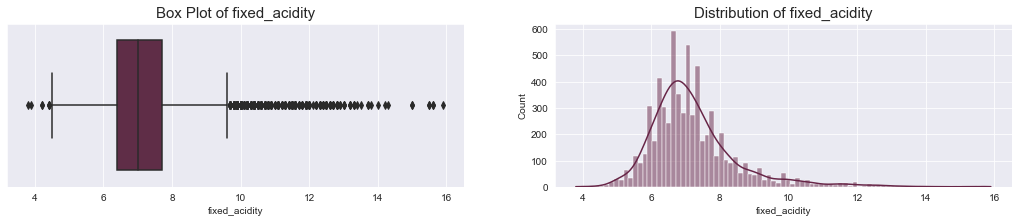

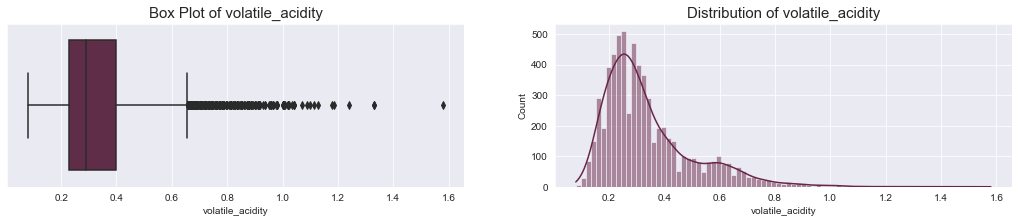

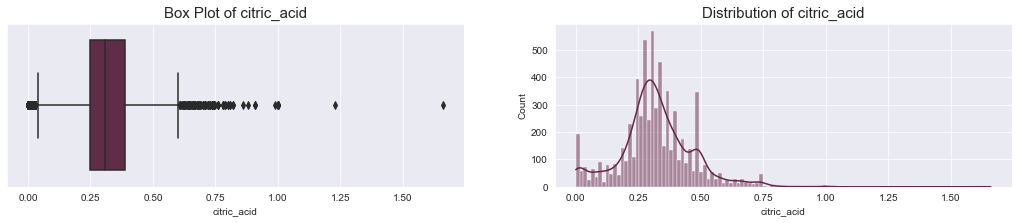

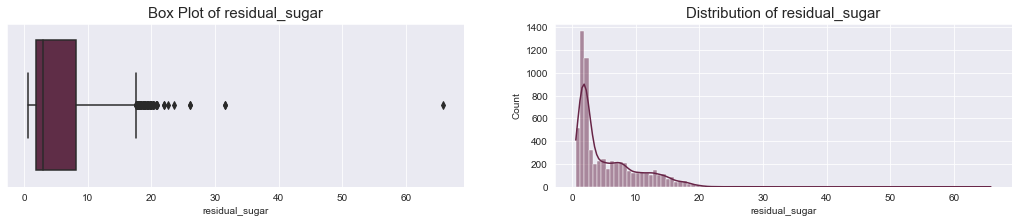

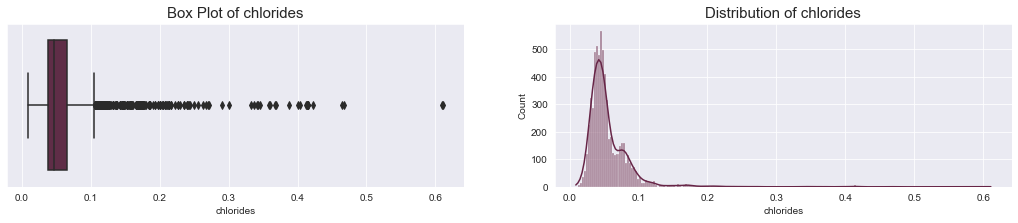

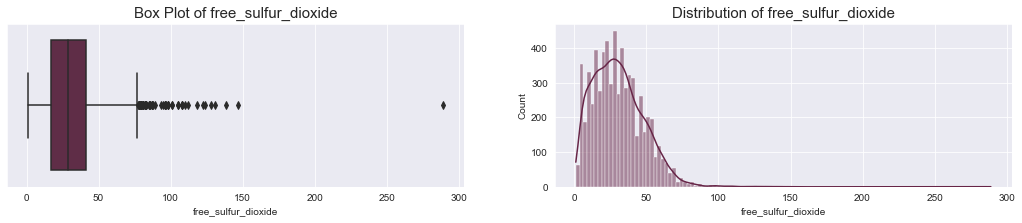

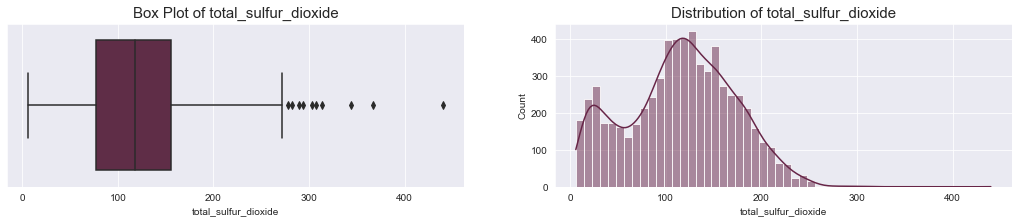

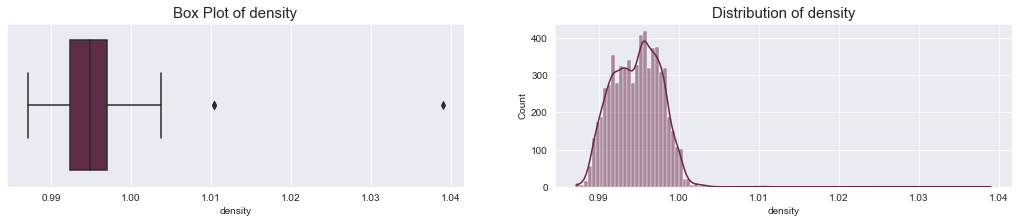

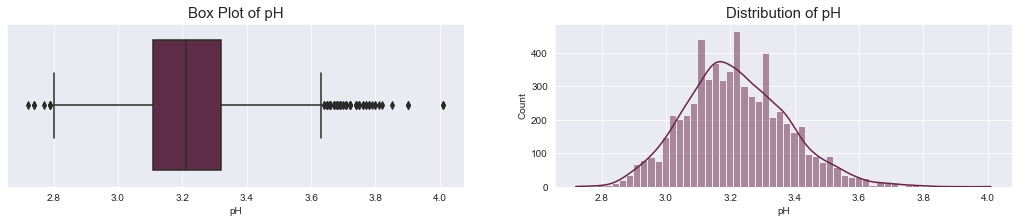

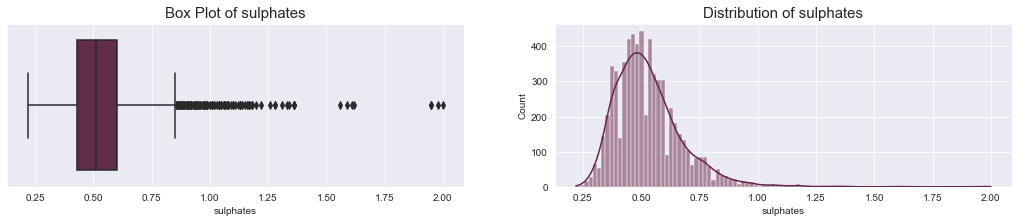

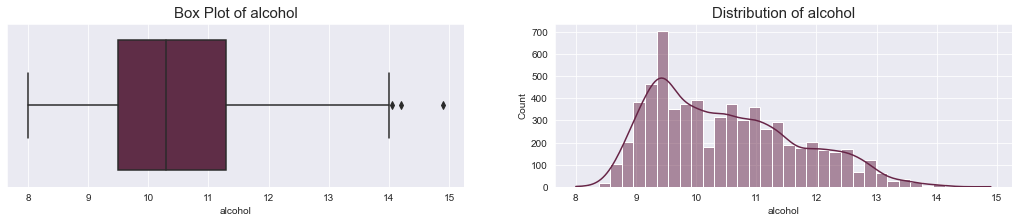

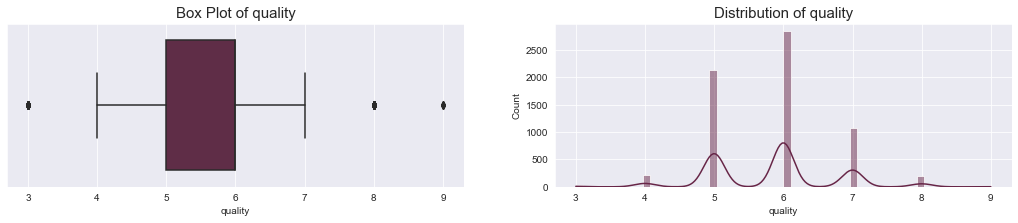

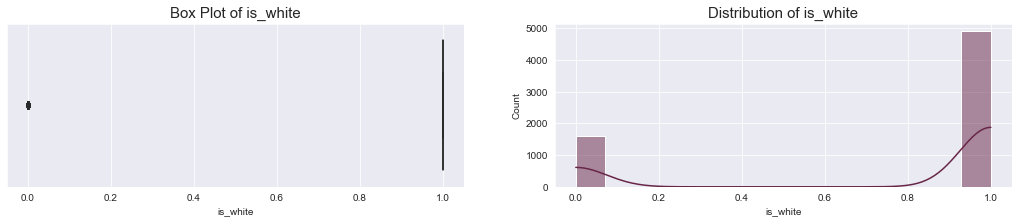

In [72]:
explore_univariate(df)

In [82]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

### Takeaways Univariate Exploration
**Target**
- Looks like our target, `quality`, is mostly normally distributed. This will be good to know for future tests and regression modeling
- Either Multi Class Classification
- Regression for guessing 
- According to Docs wine rating is from 0 - 10
    - There are no wines with a 0 1 or 2 rating, and none with a 10
    - Most wines are in the 5 and 6 range
- Might split into 3 categories (these might not work because 3 and 4 have fewer numbers)
    - bad = 3,4,
    - average = 5,6 
    - best = 7, 8,9
- Idea for 2 categories (for targeting those stand out wines)
    - average = 3 - 6
    - best = 7 - 9

**Variables**
- There are more white wines than red ones (if white and red becomes a huge factor in determining the quality I might not be able to use that feature, or I may need to ensure those are stratified across the train test split
- Most variables are normally distributed ish 
- Alcohol and residual sugar are skewed to the right
    - There are not a lot of wines low in sugar
- There are some outliers but I'll deal with those on a second run through if need be
- Will probably need to do some scaling of the data since they're all in different units of measurements

## Split
- Train Validate Test split Breakdown
    - 80% - 20% Train/Validate and Test split
    - 70% - 30% Train and Validate Split (from the 80 above)


In [20]:
train, validate, test = p.banana_split(df)

train --> (3637, 13)
validate --> (1560, 13)
test --> (1300, 13)


In [24]:
target = 'quality'

variables = list(train.drop(columns = target))

In [26]:
target, variables

('quality',
 ['fixed_acidity',
  'volatile_acidity',
  'citric_acid',
  'residual_sugar',
  'chlorides',
  'free_sulfur_dioxide',
  'total_sulfur_dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'is_white'])

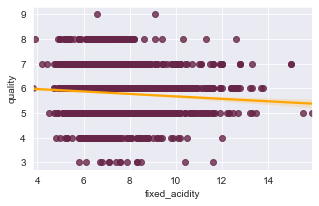

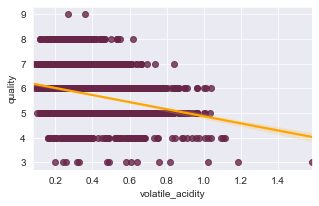

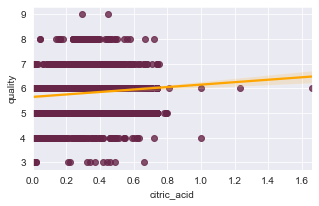

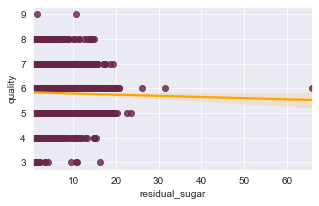

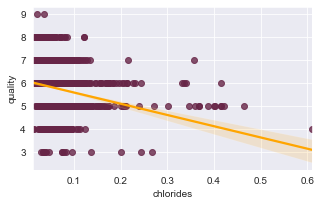

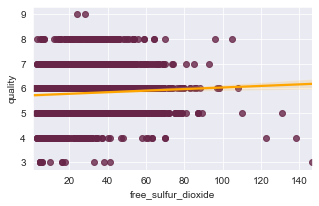

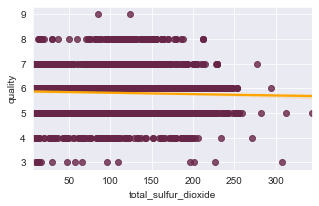

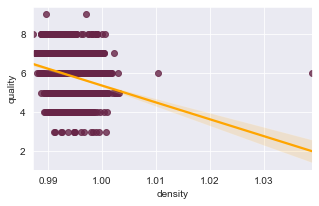

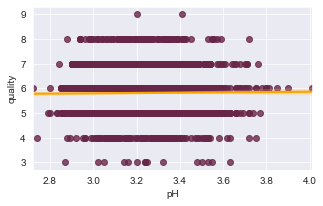

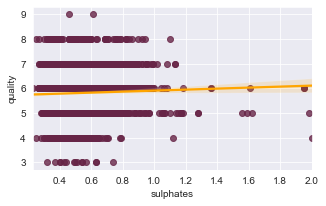

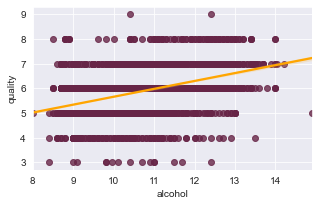

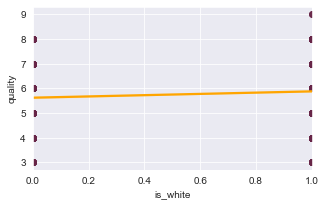

In [73]:
ex.plot_against_target(train, target, variables, figsize=(5,3))

In [35]:
df.alcohol.dtypes != 'O'

True

In [76]:
def plot_box_against_target(df, target, var_list, figsize = (10,5), hue = None):
    '''
    This function takes in a dataframe, target name, and Var List
    Will loop through variables (makes sure it's not an Object)
    And plot them
    '''
    
    for var in var_list:
        
        if df[var].dtypes != 'O':
            # create box plot
            plt.figure(figsize = figsize)
            sns.boxplot(data = df, x = target, y = var, palette=wine_palette2)
            plt.title(f'{var} and {target}')
            
            mean = round(df[var].mean(),2)
            plt.axhline(mean, c = 'yellow', lw = 4, alpha = .8)
            plt.show()
            
            print(f'Overall mean for {var} is: {mean}')
            print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ \n')


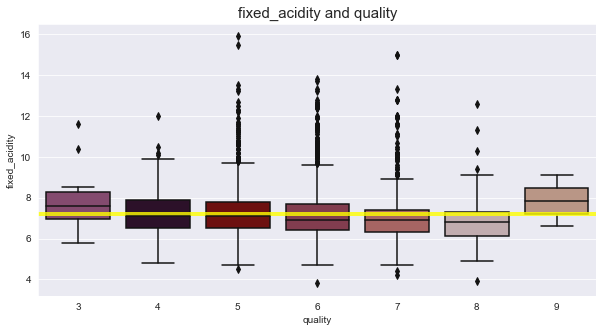

Overall mean for fixed_acidity is: 7.21
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



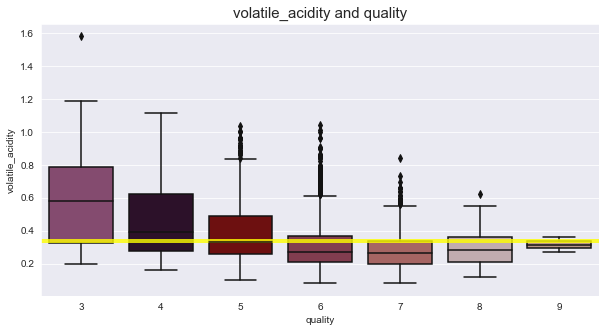

Overall mean for volatile_acidity is: 0.34
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



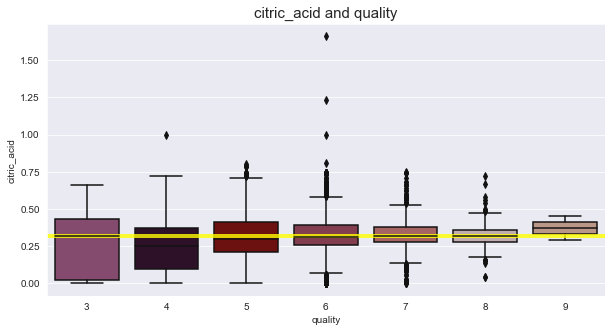

Overall mean for citric_acid is: 0.32
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



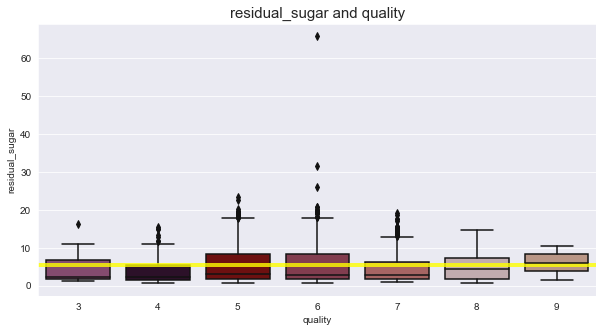

Overall mean for residual_sugar is: 5.39
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



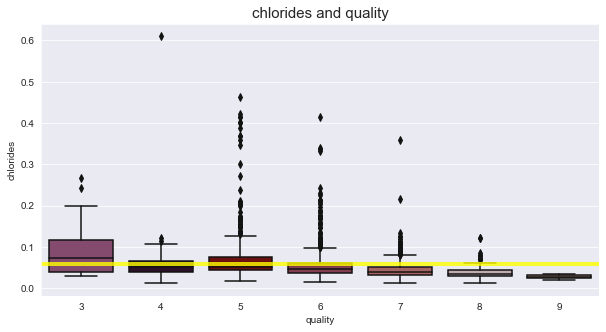

Overall mean for chlorides is: 0.06
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



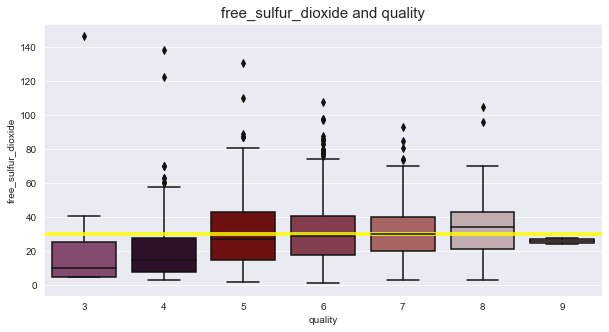

Overall mean for free_sulfur_dioxide is: 30.24
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



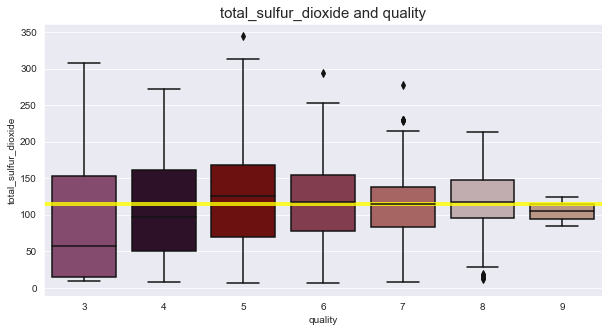

Overall mean for total_sulfur_dioxide is: 115.3
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



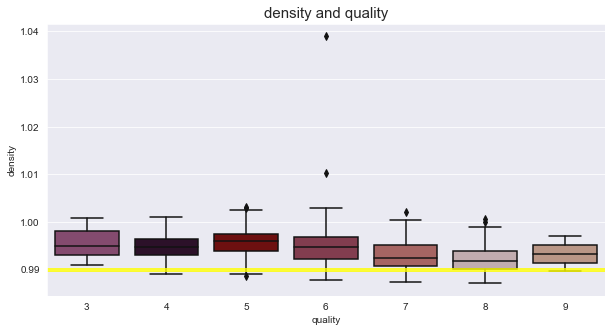

Overall mean for density is: 0.99
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



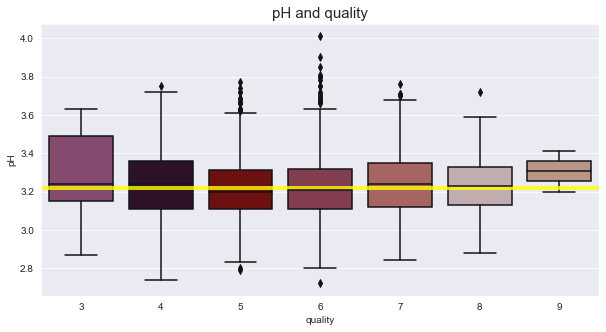

Overall mean for pH is: 3.22
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



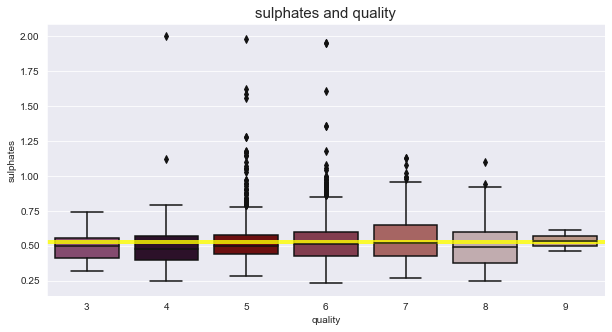

Overall mean for sulphates is: 0.53
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



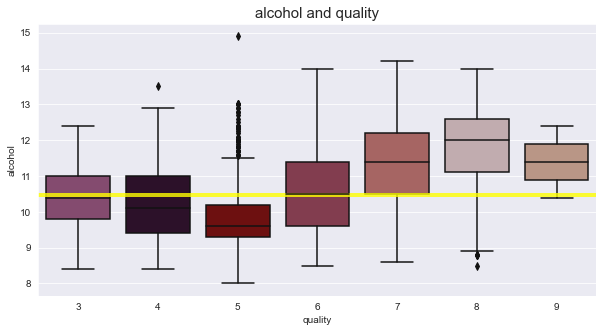

Overall mean for alcohol is: 10.48
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



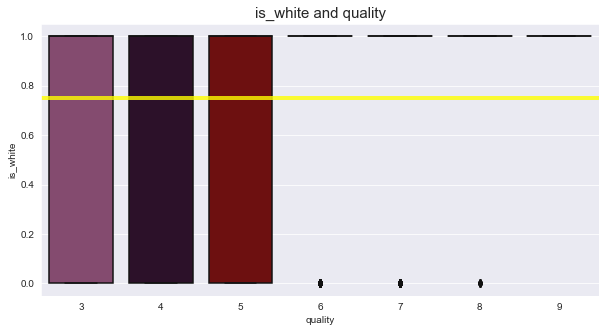

Overall mean for is_white is: 0.75
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



In [77]:
plot_box_against_target(train, target, variables)

### Takeaways Box Plots
- volatility acidity average for lowest rated wines, is much higher than the average
- Average sulfur dioxide content for lowest rated wines is much lower than the overall mean
- citric acid mean for highest rated wines is higher than overall mean (only category to do so)
- rating 7, 8, and 9 have higher mean for alcohol content is well above the mean for the whole group
- Maybe need to divide into three groups, bad, good, best


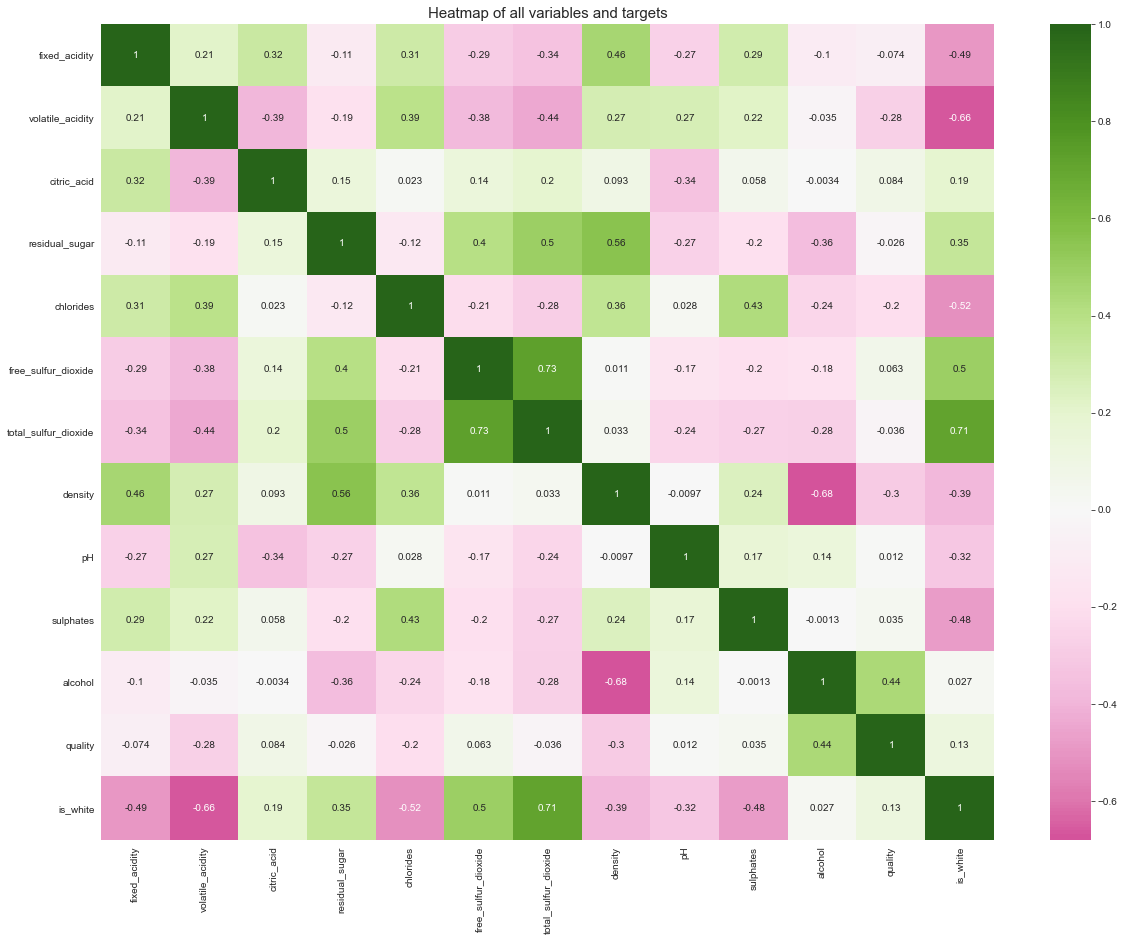

In [100]:
plt.figure(figsize = (20, 15))
sns.heatmap(train.corr(), annot = True, cmap = 'PiYG', center = 0)
plt.title('Heatmap of all variables and targets')
plt.show()

## Statistical Testing
- Questions to ask
    - Do alcohol content and wine score have a linear relationship? (continuous vs continuous Pearson R)
    - Similar, is the mean alcohol content for best wines (7-9) higher than the population alcohol content mean (continuous vs categorical one_samp one-tailed, t-test)
    - Does Free Sulfer dioxide level have a linear relationship with quality? (continuous vs continuous Pearson R)
    - Does Free 